In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df=pd.read_csv('/kaggle/input/pokemon-images-and-types/pokemon.csv')

In [ ]:
df1=df[['Name','Type1']]

In [ ]:
df1

In [ ]:
df2=df[['Name','Type2']]

In [71]:
df2

,Name,Type
0,bulbasaur,Poison
1,ivysaur,Poison
2,venusaur,Poison
5,charizard,Flying
11,butterfree,Flying
...,...,...
800,magearna,Fairy
801,marshadow,Ghost
803,naganadel,Dragon
804,stakataka,Steel


In [72]:
df1.isna().sum()

Name    0
Type    0
dtype: int64

In [73]:
df2=df2.dropna()

In [74]:
df1.rename(columns = {'Type1':'Type'}, inplace = True)
df2.rename(columns = {'Type2':'Type'}, inplace = True)

In [75]:
df=pd.concat([df1,df2])

In [76]:
df

,Name,Type
0,bulbasaur,Grass
1,ivysaur,Grass
2,venusaur,Grass
3,charmander,Fire
4,charmeleon,Fire
...,...,...
800,magearna,Fairy
801,marshadow,Ghost
803,naganadel,Dragon
804,stakataka,Steel


In [77]:
df.isnull().sum()

Name    0
Type    0
dtype: int64

In [79]:
# os.mkdir('train')
# os.mkdir('test')

In [80]:
names=df['Type'].unique()

In [81]:
df['Name']

0        bulbasaur
1          ivysaur
2         venusaur
3       charmander
4       charmeleon
          ...     
800       magearna
801      marshadow
803      naganadel
804      stakataka
805    blacephalon
Name: Name, Length: 1214, dtype: object

In [84]:
# for i in names:
#     os.mkdir('train/'+i)
#     os.mkdir('test/'+i)

In [85]:
import shutil

In [86]:
# os.listdir('/kaggle/input/pokemon-images-and-types/images/images/')

In [87]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2,random_state=42)

In [88]:
train

,Name,Type
720,volcanion,Fire
352,shuppet,Ghost
677,meowstic-male,Psychic
506,herdier,Normal
526,woobat,Flying
...,...,...
493,victini,Fire
623,pawniard,Steel
679,doublade,Ghost
111,rhydon,Rock


In [89]:
test

,Name,Type
739,crabominable,Fighting
788,cosmog,Psychic
43,gloom,Grass
155,quilava,Fire
494,snivy,Grass
...,...,...
59,poliwag,Water
71,tentacool,Poison
63,kadabra,Psychic
723,decidueye,Grass


In [90]:
train.iloc[0]['Name']

'volcanion'

In [91]:
for i in range(len(train)):
    try:
        shutil.copy('/kaggle/input/pokemon-images-and-types/images/images/'+train.iloc[i]['Name']+'.png','/kaggle/working/train/'+train.iloc[i]['Type']+'/'+train.iloc[i]['Name']+'.png')
    except:
        shutil.copy('/kaggle/input/pokemon-images-and-types/images/images/'+train.iloc[i]['Name']+'.jpg','/kaggle/working/train/'+train.iloc[i]['Type']+'/'+train.iloc[i]['Name']+'.jpg')

In [92]:
len(os.listdir('/kaggle/input/pokemon-images-and-types/images/images/'))

809

In [93]:
# for i in range(len(test)):
#     try:
#         os.remove('/kaggle/working/train/'+test.iloc[i]['Type']+'/'+test.iloc[i]['Name']+'.png')
#     except:
#         os.remove('/kaggle/working/train/'+test.iloc[i]['Type']+'/'+test.iloc[i]['Name']+'.jpg')

In [94]:
for i in range(len(test)):
    try:
        shutil.copy('/kaggle/input/pokemon-images-and-types/images/images/'+test.iloc[i]['Name']+'.png','/kaggle/working/test/'+test.iloc[i]['Type']+'/'+test.iloc[i]['Name']+'.png')
    except:
        shutil.copy('/kaggle/input/pokemon-images-and-types/images/images/'+test.iloc[i]['Name']+'.jpg','/kaggle/working/test/'+test.iloc[i]['Type']+'/'+test.iloc[i]['Name']+'.jpg')

In [95]:
os.listdir('/kaggle/working/test/Rock')

['lileep.png',
 'nosepass.png',
 'carracosta.png',
 'corsola.png',
 'sudowoodo.png',
 'relicanth.png',
 'tyranitar.png',
 'kabutops.png',
 'archeops.png',
 'bastiodon.png']

In [96]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [97]:
import cv2

In [98]:
img=cv2.imread('/kaggle/working/test/Rock/tyranitar.png')
img.shape

(120, 120, 3)

In [99]:
batch_size = 32
img_height = 120
img_width = 120

In [100]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/working/train',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 971 files belonging to 18 classes.


In [101]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/working/test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 243 files belonging to 18 classes.


In [102]:
class_names=train_ds.class_names

In [103]:
class_names

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

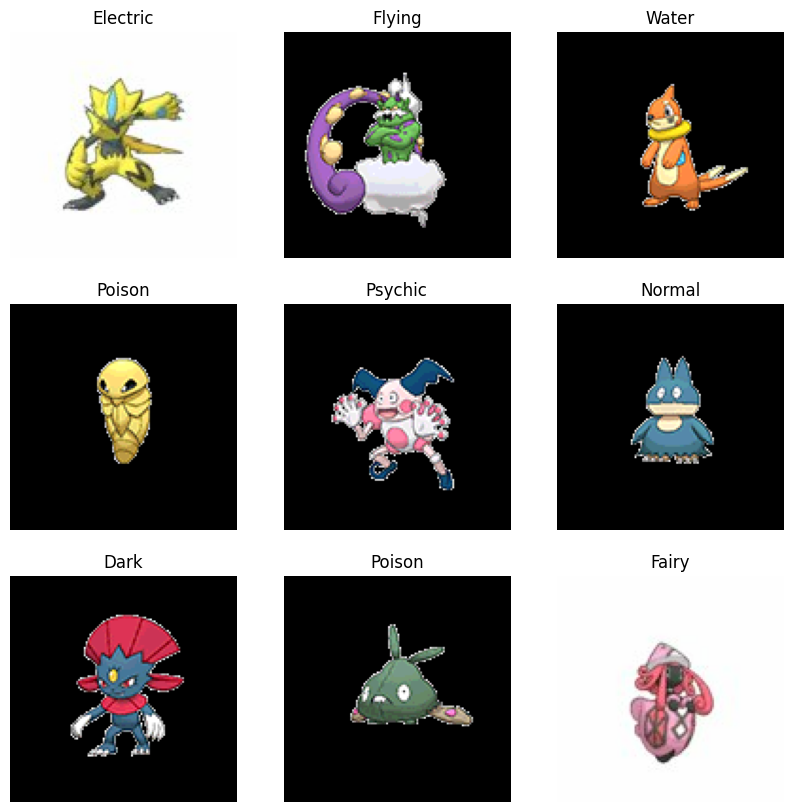

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [105]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 120, 120, 3)
(32,)


In [106]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [107]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [108]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [109]:
num_classes = 18

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [110]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [111]:
# model.summary()

In [112]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=50
)

Epoch 1/50
31/31 [==============================] - 12s 34ms/step - loss: 2.8322 - accuracy: 0.1123 - val_loss: 2.8507 - val_accuracy: 0.0823
Epoch 2/50
31/31 [==============================] - 0s 12ms/step - loss: 2.7064 - accuracy: 0.1689 - val_loss: 2.9237 - val_accuracy: 0.0988
Epoch 3/50
31/31 [==============================] - 0s 12ms/step - loss: 2.5272 - accuracy: 0.2091 - val_loss: 3.1148 - val_accuracy: 0.0988
Epoch 4/50
31/31 [==============================] - 0s 12ms/step - loss: 2.3376 - accuracy: 0.2513 - val_loss: 3.0825 - val_accuracy: 0.1317
Epoch 5/50
31/31 [==============================] - 0s 12ms/step - loss: 2.0908 - accuracy: 0.3265 - val_loss: 3.4017 - val_accuracy: 0.1235
Epoch 6/50
31/31 [==============================] - 0s 12ms/step - loss: 1.8253 - accuracy: 0.3831 - val_loss: 3.5935 - val_accuracy: 0.0905
Epoch 7/50
31/31 [==============================] - 0s 12ms/step - loss: 1.7201 - accuracy: 0.4140 - val_loss: 3.3500 - val_accuracy: 0.0617
Epoch 8/50
3

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9

In [114]:
model.save('Label_new.h5')

In [115]:
from keras.utils import load_img, img_to_array

def type_pred(name):
    img = load_img('/kaggle/input/pokemon-images-and-types/images/images/'+ name +'.png')
    img = img_to_array(img)
    img = img/255

    classes=['Rock',      'Ice',   'Poison',   'Flying',
             'Dragon',  'Psychic',   'Ground',    'Fairy',   'Normal',     'Fire',
              'Water',    'Ghost', 'Electric',      'Bug',    'Steel',     'Dark',
              'Grass', 'Fighting']
    proba = model.predict(img.reshape(1,120,120,3))
    print(proba)
    top_3 = np.argsort(proba[0])[:-4:-1]
    print(top_3)
    for i in range(3):
        print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
    plt.imshow(img)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 174ms/step
[[0.06161342 0.05096135 0.05486228 0.05726323 0.05610887 0.05030449
  0.05178036 0.05518059 0.0534349  0.06066014 0.05651642 0.04997564
  0.05679423 0.05600848 0.05453584 0.05786733 0.05643634 0.05969606]]
[ 0  9 17]
Rock (0.0616)
Fire (0.0607)
Fighting (0.0597)


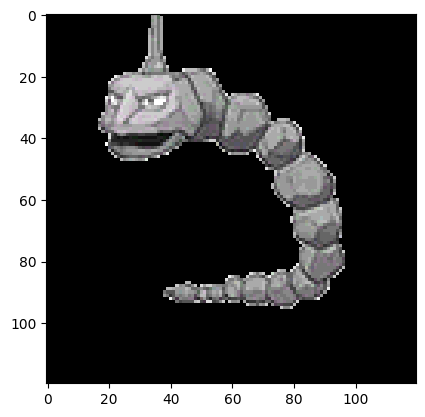

In [116]:
type_pred('onix')

1/1 [==============================] - 0s 22ms/step
[[0.06161342 0.05096135 0.05486228 0.05726323 0.05610887 0.05030449
  0.05178036 0.05518059 0.0534349  0.06066014 0.05651642 0.04997564
  0.05679423 0.05600848 0.05453584 0.05786733 0.05643634 0.05969606]]
[ 0  9 17]
Rock (0.0616)
Fire (0.0607)
Fighting (0.0597)


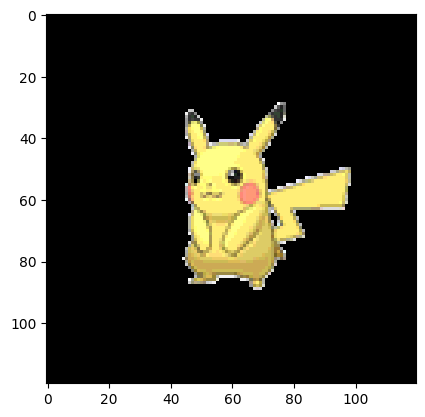

In [117]:
type_pred('pikachu')

1/1 [==============================] - 0s 22ms/step
[[0.06161342 0.05096135 0.05486228 0.05726323 0.05610887 0.05030449
  0.05178036 0.05518059 0.0534349  0.06066014 0.05651642 0.04997564
  0.05679423 0.05600848 0.05453584 0.05786733 0.05643634 0.05969606]]
[ 0  9 17]
Rock (0.0616)
Fire (0.0607)
Fighting (0.0597)


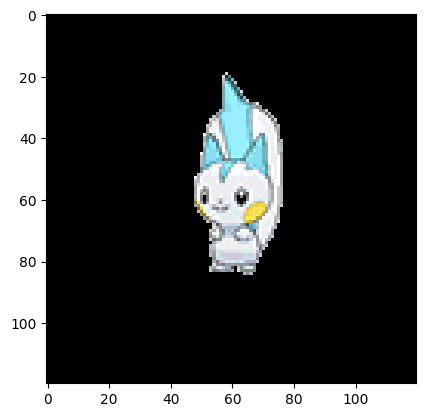

In [118]:
type_pred('pachirisu')

1/1 [==============================] - 0s 22ms/step
[[0.06161342 0.05096135 0.05486228 0.05726323 0.05610887 0.05030449
  0.05178036 0.05518059 0.0534349  0.06066014 0.05651642 0.04997564
  0.05679423 0.05600848 0.05453584 0.05786733 0.05643634 0.05969606]]
[ 0  9 17]
Rock (0.0616)
Fire (0.0607)
Fighting (0.0597)


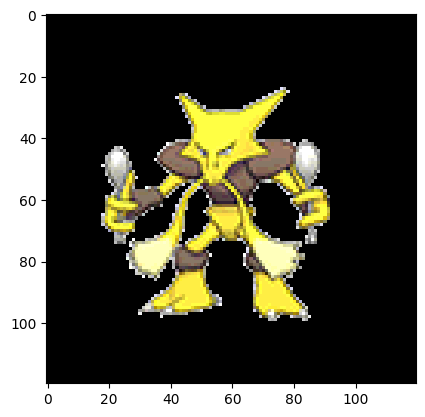

In [119]:
type_pred('alakazam')

In [ ]:
type_pred('bulbasaur')